In [11]:
import pandas as pd

# Figure 8

In [12]:
def readCSVhyper(file_path):
    column_names = ['index', 'eps', 
                    'base_type', 'base_time', 'base_visit', 'base_status', 
                    'oliva_type', 'oliva_time', 'oliva_visit', 'oliva_status', 
                    'g0_type', 'g0_time', 'g0_visit', 'g0_status', 
                    'g1_type', 'g1_time', 'g1_visit', 'g1_status', 
                    'g2_type', 'g2_time', 'g2_visit', 'g2_status', 
                    'g3_type', 'g3_time', 'g3_visit', 'g3_status', 
                    'g4_type', 'g4_time', 'g4_visit', 'g4_status', 
                    'g5_type', 'g5_time', 'g5_visit', 'g5_status']
    dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
    return dataframe

In [13]:
df = readCSVhyper("all_results/hyper_lambda.csv")

dfp = df[ (df.oliva_status != "Status.UNKNOWN") | (df.g0_status != "Status.UNKNOWN") | (df.g1_status != "Status.UNKNOWN") | (df.g1_status != "Status.UNKNOWN") | (df.g2_status != "Status.UNKNOWN") | (df.g3_status != "Status.UNKNOWN") | (df.g4_status != "Status.UNKNOWN") | (df.g5_status != "Status.UNKNOWN")].copy()


In [14]:

ratios_df=pd.DataFrame()
ratios_df['λ=0'] = dfp['base_time'] / dfp['g0_time']
ratios_df['λ=0.2'] = dfp['base_time'] / dfp['g1_time']
ratios_df['λ=0.4'] = dfp['base_time'] / dfp['g2_time']
ratios_df['λ=0.5\n(Default)'] = dfp['base_time'] / dfp['oliva_time']
ratios_df['λ=0.6'] = dfp['base_time'] / dfp['g3_time']
ratios_df['λ=0.8'] = dfp['base_time'] / dfp['g4_time']
ratios_df['λ=1'] = dfp['base_time'] / dfp['g5_time']

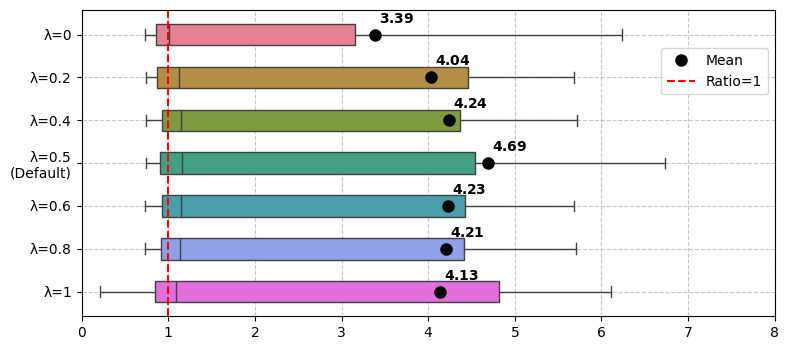

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(data=ratios_df, orient='h', width=0.5)

means = ratios_df.mean()
plt.plot(means, range(len(means)), 'o', markersize=8, label='Mean', color='black')

for i, mean in enumerate(means):
    ax.annotate(f'$\\mathbf{{{mean:.2f}}}$',
                xy=(mean, i),
                xytext=(3, 6.5),
                textcoords='offset points',
                va='bottom',
                weight='bold')

ax.axvline(x=1, color='red', linestyle='--', linewidth=1.5, label='Ratio=1')

plt.legend(frameon=True, bbox_to_anchor=(1, 0.8), loc='center right')
plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 8)

# 保存为PDF
plt.savefig('boxplot_lambda.pdf', bbox_inches='tight', dpi=300)

plt.show()

In [16]:
def readCSVhypersa(file_path):
    column_names = ['id', 'eps',
                    'dfs_type', 'dfs_time', 'dfs_visit', 'dfs_status',
                    'sa0_type', 'sa0_time', 'sa0_visit', 'sa0_status', 'sa0_status_lb',
                    'sa1_type', 'sa1_time', 'sa1_visit', 'sa1_status', 'sa1_status_lb',
                    'sa2_type', 'sa2_time', 'sa2_visit', 'sa2_status', 'sa2_status_lb',
                    'sa3_type', 'sa3_time', 'sa3_visit', 'sa3_status', 'sa3_status_lb',
                    'sa4_type', 'sa4_time', 'sa4_visit', 'sa4_status', 'sa4_status_lb',
                    'sa5_type', 'sa5_time', 'sa5_visit', 'sa5_status','sa5_status_lb']
    dataframe = pd.read_csv(file_path, sep=",", names=column_names)
    return dataframe

In [17]:

df = readCSVhypersa("all_results/Result_Sensitive_01_alpha.csv")

dfp = df[ (df.dfs_status != "Status.UNKNOWN") | (df.sa0_status != "Status.UNKNOWN") | (df.sa1_status != "Status.UNKNOWN") | (df.sa2_status != "Status.UNKNOWN") | (df.sa3_status != "Status.UNKNOWN") | (df.sa4_status != "Status.UNKNOWN")  | (df.sa5_status != "Status.UNKNOWN")].copy()


In [18]:

ratios_df = pd.DataFrame()
ratios_df["id"] = dfp['id']
ratios_df["eps"] = dfp['eps']
ratios_df['α=0.95'] = dfp['dfs_time'] / dfp['sa0_time']
ratios_df['α=0.96'] = dfp['dfs_time'] / dfp['sa1_time']
ratios_df['α=0.97'] = dfp['dfs_time'] / dfp['sa2_time']
ratios_df['α=0.98'] = dfp['dfs_time'] / dfp['sa3_time']
ratios_df['α=0.99'] = dfp['dfs_time'] / dfp['sa4_time']
ratios_df['α=0.999'] = dfp['sa4_time'] / dfp['sa5_time']

# Figure 9

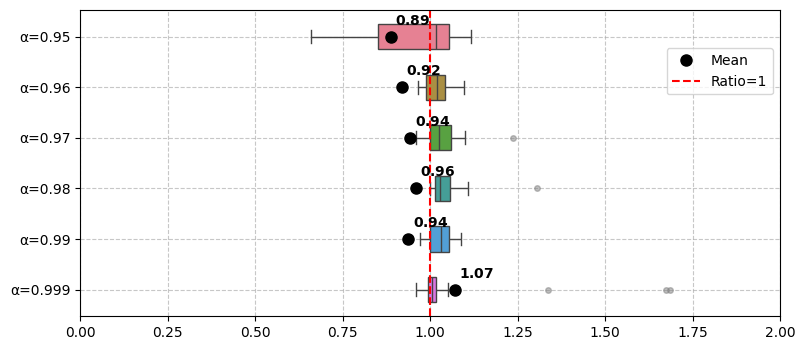

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set_palette("husl")

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Select only the alpha columns for the plot (exclude 'id' and 'eps')
plot_data = ratios_df.iloc[:, 2:]  # Skip the first two columns (id and eps)

# Create boxplot with showfliers=False to hide default outlier points
sns.boxplot(data=plot_data, orient='h', width=0.5, showfliers=False)

# Calculate means
means = plot_data.mean()

# Plot means
plt.plot(means, range(len(means)), 'o', markersize=8, label='Mean', color='black')

# Add mean value annotations
for i, mean in enumerate(means):
    ax.annotate(f'$\\mathbf{{{mean:.2f}}}$',
                xy=(mean, i),
                xytext=(3, 6.5),
                textcoords='offset points',
                va='bottom',
                weight='bold')

# Add custom flier points (outliers) capped at max=2
for i, col in enumerate(plot_data.columns):
    data = plot_data[col]
    
    # Calculate quartiles and IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier bounds
    upper_bound = q3 + 1.5 * iqr
    
    # Get outliers
    outliers = data[data > upper_bound]
    
    # Cap outliers at max=2
    outliers = outliers.clip(upper=2)
    
    # Plot capped outliers
    if len(outliers) > 0:
        plt.plot(outliers, [i] * len(outliers), 'o', 
                color='gray', alpha=0.5, markersize=4)

# Add reference line at x=1
ax.axvline(x=1, color='red', linestyle='--', linewidth=1.5, label='Ratio=1')

# Customize plot
plt.legend(frameon=True, bbox_to_anchor=(1, 0.8), loc='center right')
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 2)

# Save plot
plt.savefig('boxplot_alpha.pdf', bbox_inches='tight', dpi=300)

# Show plot
plt.show()